In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
students_df = pd.read_csv("students.csv")
course_activity_df = pd.read_csv("course_activity.csv")
feedback_df = pd.read_csv("feedback.csv")

In [4]:
print(students_df.info())
print(course_activity_df.info())
print(feedback_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes: float64(1), in

In [8]:
students_df['Enrolment_Date'] = pd.to_datetime(students_df['Enrolment_Date'], dayfirst=True)
course_activity_df['Date'] = pd.to_datetime(course_activity_df['Date'], dayfirst=True)

In [6]:
students_df.drop_duplicates(inplace=True)
course_activity_df.drop_duplicates(inplace=True)
feedback_df.drop_duplicates(inplace=True)

In [9]:
print(students_df.isnull().sum())
print(course_activity_df.isnull().sum())
print(feedback_df.isnull().sum())

Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64
Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64
Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64


In [10]:
print(students_df.shape)
print(course_activity_df.shape)
print(feedback_df.shape)

(100, 6)
(659, 5)
(80, 4)


EDA 

What is the overall average completion rate across courses?

In [11]:
avg_completion = course_activity_df['Completion_Percentage'].mean()
print(f"Overall average completion rate is : {avg_completion :2f} %")

Overall average completion rate is : 54.778710 %


Which course has the highest and lowest average engagement time?

In [12]:
avg_engtime = course_activity_df.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values()
print("Highest engagement time is:\n",avg_engtime.tail())
print("Lowest engagement time is:\n",avg_engtime.head())

Highest engagement time is:
 Course_ID
PY202     93.902439
WD404     96.419162
UX303     99.816568
DM101    102.427673
Name: Time_Spent_Minutes, dtype: float64
Lowest engagement time is:
 Course_ID
PY202     93.902439
WD404     96.419162
UX303     99.816568
DM101    102.427673
Name: Time_Spent_Minutes, dtype: float64


How does engagement differ by age group or location?

In [41]:
bins = [15,20,25,30,35]
labels = ['15-20', '21-25','26-30','31-35']
students_df['Age_Groups'] = pd.cut(students_df['Age'], bins=bins, labels=labels)

In [42]:
print(students_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student_ID      100 non-null    object        
 1   Name            100 non-null    object        
 2   Age             100 non-null    int64         
 3   Gender          100 non-null    object        
 4   Location        100 non-null    object        
 5   Enrolment_Date  100 non-null    datetime64[ns]
 6   Age_Groups      100 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(4)
memory usage: 5.1+ KB
None


In [43]:
print(students_df.head(3))

  Student_ID       Name  Age  Gender Location Enrolment_Date Age_Groups
0       S001  Student_1   24  Female  Kolkata     2023-11-24      21-25
1       S002  Student_2   32   Other  Chennai     2023-02-27      31-35
2       S003  Student_3   28   Other   Mumbai     2023-01-13      26-30


In [44]:
merge_col = pd.merge(students_df, course_activity_df, on =['Student_ID'])

By age group

In [45]:
grouped_age = merge_col.groupby('Age_Groups')['Time_Spent_Minutes'].mean()
print("Engagement differ by age groups :", grouped_age)

Engagement differ by age groups : Age_Groups
15-20     99.416107
21-25    101.828877
26-30     95.867403
31-35     94.718310
Name: Time_Spent_Minutes, dtype: float64


C:\Users\Aditi\AppData\Local\Temp\ipykernel_24480\972678678.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = merge_col.groupby('Age_Groups')['Time_Spent_Minutes'].mean()


By location

In [46]:
loc = merge_col.groupby('Location')['Time_Spent_Minutes'].mean().sort_values(ascending = False )
print("Engagement differ by loc :", loc)

Engagement differ by loc : Location
Kolkata      104.384615
Delhi        103.302857
Bangalore     98.000000
Mumbai        95.435484
Chennai       90.946746
Name: Time_Spent_Minutes, dtype: float64


What is the average feedback rating per course?

In [56]:
avg_feedback =  feedback_df.groupby('Course_ID')['Rating'].mean().reset_index()
print("Average feedback rating per course is :", avg_feedback)

Average feedback rating per course is :   Course_ID    Rating
0     DM101  2.900000
1     PY202  3.277778
2     UX303  2.923077
3     WD404  2.789474


Is there a correlation between completion rate and feedback rating?

In [21]:
merge_cols = pd.merge(feedback_df, course_activity_df, on =['Student_ID','Course_ID'])

In [22]:
correlation_matrix = merge_cols [['Completion_Percentage','Rating']].corr()
print("Correlation betn this is :", correlation_matrix)

Correlation betn this is :                        Completion_Percentage    Rating
Completion_Percentage               1.000000 -0.051708
Rating                             -0.051708  1.000000


Identify top 3 student segments based on engagement and satisfaction.

In [26]:
##we nwwd to find the avg rating and time spend per student
student_seg = merge_cols.groupby('Student_ID')[['Time_Spent_Minutes','Rating']].mean()

In [28]:
top_students =  student_seg.sort_values(by = ['Time_Spent_Minutes','Rating'], ascending = False).head(3)
print("Top 3 Students are :",top_students)

Top 3 Students are :             Time_Spent_Minutes  Rating
Student_ID                            
S036                     175.0     5.0
S081                     174.0     4.0
S064                     173.0     4.0


Data Visualization 

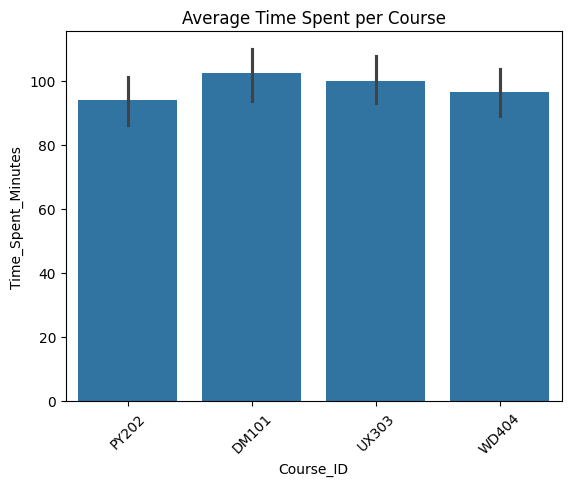

In [59]:
# Avg time spend per course
sns.barplot(data = course_activity_df, x ='Course_ID', y ='Time_Spent_Minutes')
plt.title("Average Time Spent per Course")
plt.xticks(rotation = 45)
plt.show()

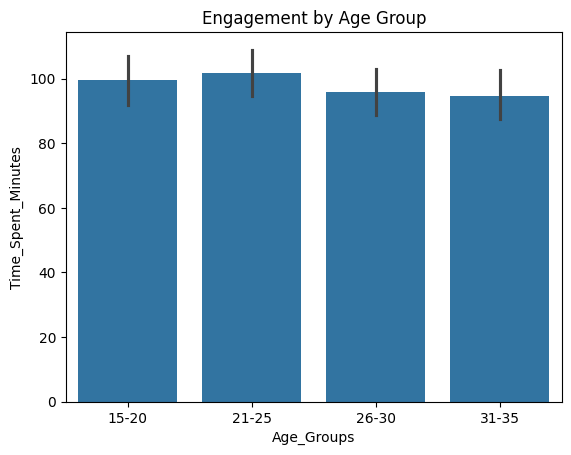

In [60]:
# Engagement by Age Group
sns.barplot(data = merge_col, x ='Age_Groups', y ='Time_Spent_Minutes')
plt.title("Engagement by Age Group")
plt.show()

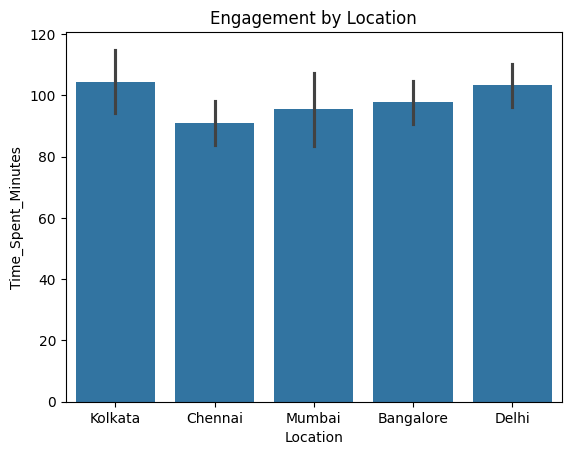

In [50]:
# Engagement by Location
sns.barplot(data = merge_col, x ='Location', y ='Time_Spent_Minutes')
plt.title("Engagement by Location")
plt.show()

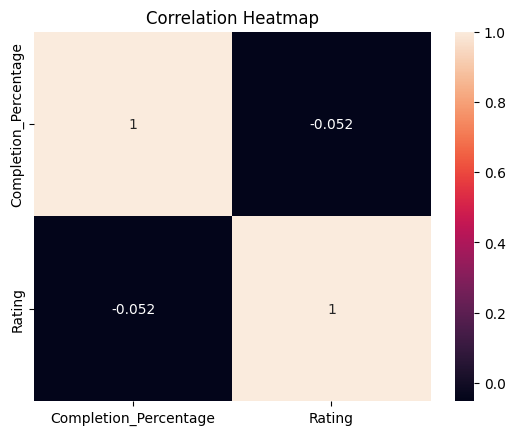

In [58]:
##Correaltion between Rating & Completion_Percentage
sns.heatmap(merge_cols[['Completion_Percentage', 'Rating']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

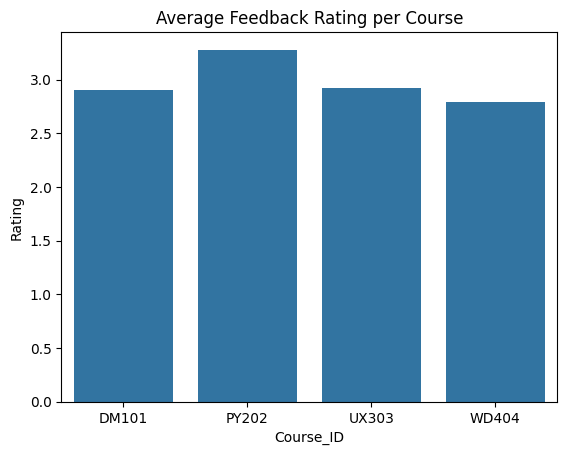

In [57]:
## Average feedback rating per course
sns.barplot(data = avg_feedback, x ='Course_ID', y ='Rating')
plt.title("Average Feedback Rating per Course")
plt.show()